In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Question: How does the presence of a adjustable shutter vent affect temperature stability within a greenhouse? This is both a design and an explanatory questions. We are explaining a vents role within the system, which in turn helps for making design decisions. It's an important question, because all over the world people living in cooler climates want to continue gardening during the colder seasons. But, when it warms up it is equally important to make sure there is proper ventilation so that the plants do not overheat.

Methods: In order to answer the question we used various equations representing heat flowing into and leaving the greenhouse. The main heat going in is solar radiation. The outflows of heat are from conduction loses and air infiltration loses. We measured the temperature inside the green house at each timestep. We also changed the value for c which represents opening and closing of the vent at various angles when it started to get too warm inside of the green house.

In [2]:
def make_system(Tout):
    init = State(Tin= 75)
    t_0 = 0
    t_end = 24 # in hours
    p = 0.8
    l = 60
    r = 1.43
    v = 1550
    a= 624
    Q = 0
    c = 1
    Tout = Tout
    dt = 2/60 #every 2 minutes
  
    return System(init=init,Tout=Tout,Q=Q, c=c, t_0=t_0, t_end=t_end, dt= dt, p=p, l=l, r=r, v=v ,a=a)

In [3]:

system = make_system(55)

init     Tin    75
dtype: int64
Tout                         55
Q                             0
c                             1
t_0                           0
t_end                        24
dt                    0.0333333
p                           0.8
l                            60
r                          1.43
v                          1550
a                           624
dtype: object

In [4]:
def update_func(state, dt, d, time, system):
    Tin = state.Tin
    
    Tout, c, p, l, r, v, a= system.Tout, system.c, system.p, system.l, system.r, system.v, system.a
    
    if time < 12:
        if Tin>79: 
            c= 3
            if Tin> 82:
                c = 3.82
                if Tin>84:
                    c = 5
    if time > 18:
        if Tin>79: 
            c= 3
            if Tin> 82:
                c = 3.82
                if Tin>84:
                    c = 5
        
    if time > 13:
        dqdt = 18416000 - ((Tin - d)*((a/r)+(p*l)+(0.02*v*c)))*1055.06
    else:
        dqdt = 15679143 - ((Tin - d)*((a/r)+(p*l)+(0.02*v*c)))*1055.06
  
    dt = system.dt
    
    q = dqdt * dt
    
    x = (q / (53.03 * 1000)) + Tin
  
    return State(Tin = x)

In [5]:
def run_simulation(system, update_func):
    t_0, t_end, dt = system.t_0, system.t_end, system.dt
    
    frame = TimeFrame(columns=system.init.index)
    frame.row[t_0] = system.init
    ts = linrange(t_0, t_end, dt)
    temperature = TimeSeries()    
    for t in ts:
        time = t
        temperature[t] = (8 * math.sin (math.radians(15 * t))) + 50
        d = temperature [t]
        res =  update_func(frame.row[t], dt, d, time, system)
        frame.row[t+dt] = res
    return frame

In [6]:
def run(system, update_func):
    change = SweepSeries()
    for change in linrange (1, 3, 0.5):
        results = run_simulation(system, update_func, change)
        plot(results.Tin, label='Temperature')
        decorate(xlabel='Time (hours)',
        ylabel='Temperature (F)')

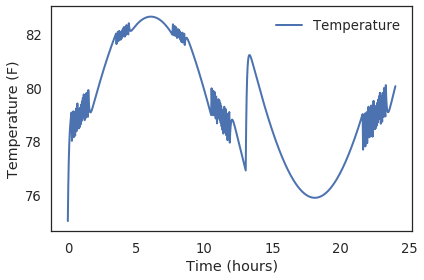

In [7]:
results = run_simulation(system, update_func)

plot(results.Tin, label='Temperature')
decorate(xlabel='Time (hours)',
         ylabel='Temperature (F)')

results: Based on the graph that is shown, with you include the vent in the model the temperature stabilizes at a little over 80 degrees farenheit. Comparatively, without the vent included the graph of temperature over time continues to increase to a temperature much too hot for plants.

Interpretation: Our model takes in equations of the flows going into and out of the greenhouse and determines the temperature of the greenhouse as well as the role the vent plays. There are many limitations of this model. For example, the equations are calculated espqciallt for a green house that is dimensioned the same way ours is. The temperature settings are also tuned to mimick the temperature in Needham in April. If the temperatures inputted became too low the model would no longer work, since many greenhouses have a furnace in the winter.